In [1]:
# Importing the necessary packages

import numpy as np
import os, sys
import matplotlib.pyplot as plt

# importing XSPEC

import xspec as xs
xs.Xset.allowPrompting = False #keeps pyxspec from hanging, waiting a response to a prompt
xs.Xset.allowNewAttributes = True

In [2]:
N = np.logspace(np.log10(8.4e-8), np.log10(8.4e2), 30) # normalization values, [1e-52 cm^-2]

E_LLE = np.load('bn081024891_EMeV.npy') # LLE energy bins, [MeV]. This is the highest background.
SED10 = np.load('bn081024891_SED10.npy') # the output of Manuel's code for this energy range

from scipy.interpolate import interp1d
f = interp1d(E_LLE*1000, SED10/1000, 'cubic', fill_value="extrapolate") # in keV and per keV

from scipy import integrate
def ALP(engs, params, flux):
    energy_binsizes = np.ediff1d(engs)
    # finding the average bin value for energy
    energy = (np.asarray(engs[:-1])+np.asarray(engs[1:]))/2
    flux[:] = f(energy) * energy_binsizes # quicker than integratinig
    
ALPInfo = ()
xs.AllModels.addPyMod(ALP, ALPInfo, 'add', spectrumDependent=False)

In [3]:
# Here, I am loading all the simulated spectra with the response function, and then plotting the unfolded spectra
# (in order to have unfolded spectrum, I load the ALP model, but I never fit it)
# I sample 20 spectra for each normalization (it takes a bit of time to plot it)

xerr_uf = np.empty((30, 21, len(E_LLE)))
yerr_uf = np.empty((30, 21, len(E_LLE)))
spec_uf = np.empty((30, 21, len(E_LLE)))
bkg_uf = np.empty((30, 21, len(E_LLE)))


xs.AllData.clear()

for j in range(30):
    xs.AllData.clear()
    for i in range(1,21):
        xs.AllData += "bn081024891_fakeit_%s.fak{%s}" %(j,i)    
        xs.response = "bn081024891_LAT-LLE_weightedrsp.rsp"
        xs.background= ("bn081024891_LAT-LLE_bkgspectra.bak{1}")
        xs.AllModels.clear() 
        m = xs.Model('ALP')
        xs.Plot.device="/xs"
        xs.Plot.xAxis="MeV"
        xs.Plot.add=True
        xs.Plot.background=False
        xs.Plot.xLog=True
        xs.Plot.yLog=True
        xs.Plot.show()
        xs.Plot("ufspec") # this is the unfolded spectrum
        xerr_uf[j, i,:] = np.asarray(xs.Plot.xErr(i))
        yerr_uf[j, i,:] = np.asarray(xs.Plot.yErr(i))
        spec_uf[j, i,:] = np.asarray(xs.Plot.y(i))


User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered 


User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered 

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:


In [4]:
# savinig all the plot values into numpy arrays

np.save('xerr_uf.npy', xerr_uf)
np.save('yerr_uf.npy', yerr_uf)
np.save('spec_uf.npy', spec_uf)

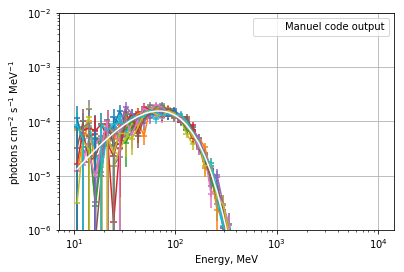

In [5]:
# Choosing an arbitrary normalization, N[20] and plotting the unfolded spectrum to compare with the input model.

for i in range(1,21):
    plt.errorbar(E_LLE, spec_uf[20,i,:], xerr=xerr_uf[20,i,:], yerr=yerr_uf[20,i,:])

plt.plot(E_LLE, SED10*N[20],'w', zorder = 2001, label='Manuel code output')
plt.xlabel('Energy, MeV')
plt.ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-6, 1e-2)
plt.grid()
plt.legend()

In [ ]:
np